<img src="./Figures/LogoObsera.png" width="75" align="left" style="vertical-align:middle;margin:0px 100px" ><h1>   River load sensor calibration</h1>


<h2>Find the regression for linking suspended load with high frequency turbidity</h2>

-------

- **Authors**: Antoine Lucas (lucas@ipgp.fr) - Amande Roque-Bernard (roquebernard@ipgp.fr) - Grégory Sainton (sainton@ipgp.fr)
- **Version**: 2.0


--------
- **Objective**: We seek to calibrate a turbidity probe placed in a river against independent measurements of suspended solids concentration.

- **The data**: The data come from ObsEra, an observatory located in Guadeloupe that gives us information on the erosion of this volcanic island in a few watersheds.

- **You will learn**: how to prepare and clean the data. It's probably the most important part of the job. Then, you will play with your first models with the `scikit-learn` library. 


- **NB1**: If some errors or bugs are still in the notebook despite our efforts, please send us an email to tell us.

- **NB2**: Solutions which will be proposed in the corrected notebooks are only a possible solution. 

- **NB3**: This notebook is based on Amande's thesis work. Further analysis can be done, please contact her. 

----
## This notebook is made of two parts 
### How to open the data ? 

It's a very guided part to learn how to have a first look on your datasets. School data ar often already clean but the real data are often very messy. So we need to spend time to clean and to prepare the data before starting the real analysis.

### Select, apply, train a model

In this section, we will play with some models using `scikit-learn` library. 
1. Linear regression
2. Principal Component Analysis (PCA)

But of course, we encourage you to go further, to test some other models and to compare your results.

Have fun !

----


## How to open the data

All the data are saved in the `data` directory of this lab.
They are separated in two subsets, one with **chemical informations** and another one with **hydrological informations**.

This part is done for you. No need to modify the following cell. Just notice that `filelist_chem` and `filelist_hydro` are the 2 arrays variables which contain the list of files we will use after.

In [41]:
%reset -f     
# The previous line is used to reset all the variables at each runs

import os, sys
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Chemical data
ObseraDir_chem = './data/CHEM/'
filelist_chem = glob(ObseraDir_chem + 'C*.csv')

#Hydrologic data
ObseraDir_hydro = './data/HYDRO/'
filelist_hydro = glob(ObseraDir_hydro + 'Data*.csv' )  # list of the raw data files        

### Observe and prepare the data
The first step is to look at your data. 

- For the first dataset, you'are guided at almost every steps. 
- For the second data set, you will have to do it on your own.

#### Chemical data

##### Read the data

1. Using the `read_csv` function from Pandas library, open the file (Use the parameter `na_value` to remove NaN) data.

2. Create a "datetime" column by adding together the columns "Date" and "Hour"   ```2020-01-06 10:00:00```
3. Convert this coloumn to a datetime format.
4. Attribute the column `datetime` as the index of your pandas structure.

**hints** 
- Beware of the separator which is a semicolon (;)
- `filelist_chem` is an array

In [42]:
# WRITE YOUR CODE HERE
data_chem = None                           # open the file 

##### Solution to read the data

In [43]:
data_chem = pd.read_csv(filelist_chem[0], sep=';', 
                        na_values = "nan")

# Create an homogenous datetime vector by concatenation of the fields "Date" and "Hour"
data_chem["datetime"] = data_chem["Date"]+" "+data_chem["Hour"]  # concat date and time in a single variable
data_chem["datetime"] = pd.to_datetime(data_chem["datetime"])    # convert the string type to datetime type
data_chem.index = data_chem["datetime"]                          # set the datetime as index
#del data_chem['datetime'] 
    
#data_chem.Date     = pd.to_datetime(data_chem.Date+ ' ' + data_chem.Hour)  # Conversion des dates en objet datetime
#data_chem          = data_chem.groupby('Date').mean()
#data_chem ['Datetime'] = data_chem.index


##### Inspect the data
Using `data_chem.head()`, `data_chem.info()`,`data_chem.describe()`, explore your data set


- numbers of rows, of columns
- checks the range of each fields
- What are the different fields, their type (especially, non numeric values).
- Do we have NaN, blank values ?

In [44]:
# WRITE YOUR CODE HERE

In [45]:
data_chem.head()

,Date,Hour,Code Site,Site,Level,Type,Flask,Twater (°C),Suspended Load,pH,...,Mg,Ca,HCO3,Cl,SO4,Conductivity at 25°C,NICB (%),Comment,Validate,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2019-09-20 10:53:00,2019-09-20,10:53,GRCCEDIG,RCCEDIG,14.0,2,P,23.3,NaN,7.28,...,NaN,NaN,30.7,NaN,NaN,64.1,NaN,Alc. mesurée en labo le 20/09/2019; autres par...,NaN,2019-09-20 10:53:00
2019-07-29 12:52:00,2019-07-29,12:52,GRCCEDIG,RCCEDIG,NaN,1,P,NaN,118.6,NaN,...,NaN,NaN,NaN,NaN,NaN,28.1,NaN,P24,NaN,2019-07-29 12:52:00
2019-07-28 20:22:00,2019-07-28,20:22,GRCCEDIG,RCCEDIG,NaN,1,P,NaN,17.8,NaN,...,NaN,NaN,NaN,NaN,NaN,30.7,NaN,P13,NaN,2019-07-28 20:22:00
2019-07-28 18:51:00,2019-07-28,18:51,GRCCEDIG,RCCEDIG,NaN,1,P,NaN,38.4,NaN,...,NaN,NaN,NaN,NaN,NaN,25.3,NaN,P12,NaN,2019-07-28 18:51:00
2019-07-28 18:36:00,2019-07-28,18:36,GRCCEDIG,RCCEDIG,NaN,1,P,NaN,48.6,NaN,...,NaN,NaN,NaN,NaN,NaN,24.4,NaN,P11,NaN,2019-07-28 18:36:00


In [46]:
data_chem.describe()

,Level,Type,Twater (°C),Suspended Load,pH,Conductivity,Na,K,Mg,Ca,HCO3,Cl,SO4,Conductivity at 25°C,NICB (%),Validate
count,561.000000,1318.000000,239.000000,340.000000,1065.000000,69.000000,1130.000000,1129.000000,1130.000000,1130.000000,1250.000000,1113.000000,1114.000000,822.000000,1130.000000,0.0
mean,35.337611,1.205615,22.471130,121.640176,7.022806,55.672464,4.029492,0.446573,0.805398,2.987206,14.804874,4.491041,1.776602,44.272506,0.383817,NaN
std,21.309709,0.404303,1.160974,206.564466,0.415355,10.359194,1.043677,0.115348,0.334657,1.201292,6.156674,1.250310,0.496980,14.028381,13.247006,NaN
min,8.000000,1.000000,20.100000,0.300000,5.570000,33.000000,1.831300,0.210000,0.130000,0.738800,4.150000,1.550000,0.760000,18.000000,-92.027346,NaN
25%,20.000000,1.000000,21.500000,16.700000,6.760000,48.000000,3.218050,0.351200,0.522325,2.002500,9.927500,3.530000,1.380000,33.700000,-5.874655,NaN
50%,30.000000,1.000000,22.400000,55.750000,7.050000,58.400000,4.013100,0.450000,0.790000,2.870000,13.925000,4.570000,1.733550,43.000000,-0.737985,NaN
75%,46.000000,1.000000,23.300000,147.500000,7.320000,63.300000,4.873150,0.530000,1.080000,3.960000,19.377500,5.290000,2.130000,53.975000,5.345601,NaN
max,152.000000,2.000000,25.700000,1702.000000,8.110000,71.500000,6.524400,1.470000,1.650000,6.195300,32.890000,13.082600,4.160000,112.000000,65.565023,NaN


In [47]:
data_chem.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1318 entries, 2019-09-20 10:53:00 to 2006-11-09 09:30:00
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1318 non-null   object        
 1   Hour                  1318 non-null   object        
 2   Code Site             1318 non-null   object        
 3   Site                  1318 non-null   object        
 4   Level                 561 non-null    float64       
 5   Type                  1318 non-null   int64         
 6   Flask                 1318 non-null   object        
 7   Twater (°C)           239 non-null    float64       
 8   Suspended Load        340 non-null    float64       
 9   pH                    1065 non-null   float64       
 10  Conductivity          69 non-null     float64       
 11  Na                    1130 non-null   float64       
 12  K                     1129 non-null   fl

##### Extract datetime and suspended Load data only

In fact, for this exercice, we only need to keep the fields `datetime` and `Suspended Load` and `Level`

1. Create a new pandas DataFrame only containing
2. Remove negative value and NaN value
3. Plot the `Suspended Load` in function of the `Datetime` (You can use either Matplotlib or Seaborn (or whatever))

**hint**
- One can remove negative value by creating a mask
- For the NaN removal, use the Pandas `.dropna()` function

In [48]:
# WRITE YOUR CODE HERE

##### Solution to select your subset

In [49]:
data_chem = data_chem[['datetime', 'Suspended Load']]
data_chem.dropna(inplace=True)

data_chem = data_chem[data_chem['Suspended Load']>0.]
data_chem.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2019-07-29 12:52:00 to 2006-12-05 10:45:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        340 non-null    datetime64[ns]
 1   Suspended Load  340 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


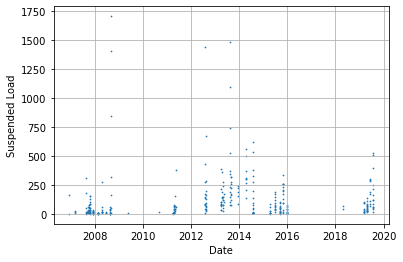

In [50]:
# Matplotlib
import matplotlib.pyplot as plt
plt.scatter(data_chem["datetime"], data_chem["Suspended Load"], s = 0.5)
plt.xlabel("Date")
plt.ylabel("Suspended Load")
plt.grid(True)

##### Plot with Seaborn

Text(0.5, 1.0, ' Suspended loaded over time')

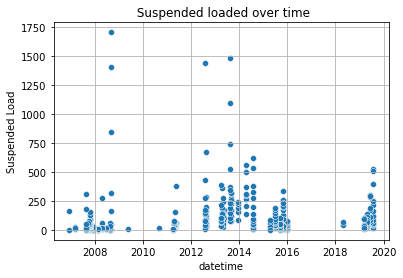

In [51]:
# Example with Seaborn Library
import seaborn as sns
sns.scatterplot(x= data_chem["datetime"], y =data_chem["Suspended Load"])
plt.grid()
plt.title(" Suspended loaded over time")

#### Hydrological data

In this second part, you will have to deal with the files in the variable `filelist_hydro`

1. Open all the files and create a unique DataFrace called `data_hydro`.
2. Inspect your data.
3. Plot the `turbidity` in function of the `datetime`


**hints**
- Create a first DataFrame with the first file and then concatenate some other DataFrame made with the other files
- Think about using `pd.concat` to concatenate the DataFrame

In [52]:
# initiate the dataframe with the first file
data_hydro = pd.read_csv(filelist_hydro[0], sep = ",",  
                         na_values = {'-30000.0', "NAN","1e+10"},
                         comment="#")

# concatenate the other files
for datafile in filelist_hydro :
    print('Dealing with file ' + datafile)
    temp = pd.read_csv(datafile, sep = ",", 
                       na_values = {'-30000.0', "NAN","1e+10"}, 
                       comment="#")
    data_hydro = pd.concat([data_hydro,temp], axis=0, 
                           ignore_index=True)     
          
#Convert datetime field to datetime format 
data_hydro["datetime"]= pd.to_datetime(data_hydro.datetime) # Conversion des dates en objet datetime
data_hydro = data_hydro.groupby('datetime').mean()          # utile en cas d'overlap, on prend la valeur moyenne
data_hydro['datetime'] =  data_hydro.index


Dealing with file ./data/HYDRO/Data_CE_DIG_Hydro_2018.csv
Dealing with file ./data/HYDRO/Data_CE_DIG_Hydro_2019.csv
Dealing with file ./data/HYDRO/Data_CE_DIG_Hydro_2014.csv
Dealing with file ./data/HYDRO/Data_CE_DIG_Hydro_2015.csv
Dealing with file ./data/HYDRO/Data_CE_DIG_Hydro_2017.csv
Dealing with file ./data/HYDRO/Data_CE_DIG_Hydro_2016.csv
Dealing with file ./data/HYDRO/Data_CE_DIG_Hydro_2012.csv
Dealing with file ./data/HYDRO/Data_CE_DIG_Hydro_2013.csv


In [53]:
# WRITE YOUR CODE HERE

In [54]:
data_hydro.describe()

,level,discharge,turbidity,conductivity,temperature
count,722105.000000,722105.000000,547116.000000,663546.000000,719533.000000
mean,21.044671,2.192647,14.128219,51.422528,22.510255
std,10.447657,3.078745,53.070967,16.990941,1.197750
min,6.821000,0.360085,0.017000,5.000000,19.060000
25%,14.348000,0.945925,1.835140,43.000000,21.590000
50%,18.190000,1.378860,2.975151,54.000000,22.520000
75%,24.460000,2.301870,4.015494,63.897764,23.300000
max,222.140000,265.815386,499.953404,283.801020,37.990000


In [55]:
data_hydro.head()

,level,discharge,turbidity,conductivity,temperature,datetime
datetime,,,,,,
2012-05-18 08:30:00,28.96,3.142280,11.79,43.0,21.89,2012-05-18 08:30:00
2012-05-18 08:35:00,28.90,3.130049,11.79,43.0,21.89,2012-05-18 08:35:00
2012-05-18 08:40:00,28.97,3.144321,11.79,43.0,21.89,2012-05-18 08:40:00
2012-05-18 08:45:00,28.86,3.121910,11.79,43.0,21.91,2012-05-18 08:45:00
2012-05-18 08:50:00,28.70,3.089483,11.79,43.0,21.91,2012-05-18 08:50:00


In [56]:
data_hydro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732981 entries, 2012-05-18 08:30:00 to 2019-07-25 10:15:00
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   level         722105 non-null  float64       
 1   discharge     722105 non-null  float64       
 2   turbidity     547116 non-null  float64       
 3   conductivity  663546 non-null  float64       
 4   temperature   719533 non-null  float64       
 5   datetime      732981 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 39.1 MB


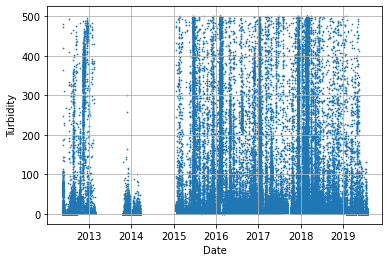

In [57]:
plt.figure()
plt.scatter(data_hydro["datetime"], data_hydro["turbidity"], s = 0.5)
plt.xlabel("Date")
plt.ylabel("Turbidity")
plt.grid(True)

## Synchronize the data
The goal here is to get the same time vector on the both structure. But the sampling is not the same for the both set of data.

To ease your life, the next part is done for you. Keep the method somewhere in case you need to use it someday.

- We first check the common interval
- Upsample the date to get the same sampling as data_chem
- Match the data 

### Synchronisation : the tricks 

You just have to execute the following cell.

In [58]:
mask = data_chem['datetime'] >= data_hydro.datetime[0] # premiere date de l'hydro
data_chem = data_chem.loc[mask]

del mask

mask    = data_chem['Suspended Load'] >= 0.
data_ch = data_chem.loc[mask]

turbidity   = data_hydro[["turbidity"]]
water_level = data_hydro[["level"]]

upsampled   = turbidity.resample('1T')
turbidity_by_minute = upsampled.interpolate(method='linear')

upsampled   = water_level.resample('1T')
water_level_by_minute = upsampled.interpolate(method='linear')

del upsampled

# How to use pandas to find consecutive same data in time series
# https://stackoverflow.com/questions/26911851/how-to-use-pandas-to-find-consecutive-same-data-in-time-series

turbidity['value_grp'] = (np.isnan(turbidity.turbidity)).astype('int')
turbidity['value_grp'] = (turbidity['value_grp'].diff(1) != 0).astype('int').cumsum()
turbidity['Date'] = turbidity.index


water_level['value_grp'] = (np.isnan(water_level.level)).astype('int')
water_level['value_grp'] = (water_level['value_grp'].diff(1) != 0).astype('int').cumsum()
water_level['Date']      = water_level.index



# decoupage par paquets de donnees de turbidity
check = pd.DataFrame({'BeginDate' : turbidity.groupby('value_grp').Date.first(), 
              'EndDate' : turbidity.groupby('value_grp').Date.last(),
              'Consecutive' : turbidity.groupby('value_grp').size(),
              'sum' : turbidity.groupby('value_grp').turbidity.sum().astype('float')}).reset_index(drop=True)   

    
for i in range(len(check)):
    if check['sum'][i] > 0. : # le morceau contient des donnees car la somme des valeurs est positive
        continue
    else:
        if check['Consecutive'][i] > 3. :  # le chunk contient trop de nan pour une interpolation correct 
                                           # donc valeurs de linterpolation changé en NAN
            turbidity_by_minute[check['BeginDate'][i]:check['EndDate'][i]] = np.NaN
            water_level_by_minute[check['BeginDate'][i]:check['EndDate'][i]] = np.NaN

       
common = turbidity_by_minute.index.intersection(data_ch['Suspended Load'].index)
suspended_load = data_ch['Suspended Load'].loc[common]

turbidity_by_minute            = turbidity_by_minute.loc[common]
matching_turbidity_by_minute   = turbidity_by_minute.loc[common]
matching_water_level_by_minute = water_level_by_minute.loc[common]

turbidity_by_minute   = matching_turbidity_by_minute        
water_level_by_minute = matching_water_level_by_minute    

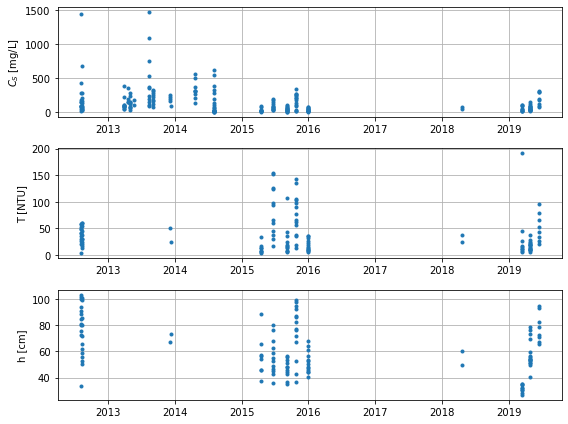

In [59]:
fig = plt.figure(figsize=(8,6))

ax1 = plt.subplot(311)
plt.plot(suspended_load[:],'.')
plt.grid()
plt.ylabel('$C_{S}$ [mg/L]')

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(matching_turbidity_by_minute,'.')
plt.ylabel('T [NTU]')
plt.grid()
fig.tight_layout()

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(matching_water_level_by_minute,'.')
plt.ylabel('h [cm]')
plt.grid()
fig.tight_layout()

In [60]:
SS   = np.array(suspended_load)
TUR  = np.array(matching_turbidity_by_minute)
H    = np.array(matching_water_level_by_minute)

SS  = np.squeeze(SS)
TUR = np.squeeze(TUR)
H   = np.squeeze(H)

mask = ~np.isnan(TUR)

SS   = SS[mask]
TUR  = TUR[mask]
H    = H[mask]

TUR1,SS = zip(*sorted(zip(TUR,SS)))
TUR,H = zip(*sorted(zip(TUR,H)))

del TUR1

In [61]:
data = pd.DataFrame({'turbidity':TUR, 'level':H, 'Suspended Load': SS})

### Questions

The final DataFrame you will have to deal with is `data`

**Have a quick view on your data**

Using scatter_matrix from pandas, one can have a look on all the variable of the dataset Histogram in diagonal and plot 

**Make two plots (horizontal subplots)**:
1. Suspended Load in function of the Turbidity
2. Suspended Load in function of the Level


In [62]:
# Have a quick view on your data -> WRITE YOUR CODE HERE

#### Solution

array([[<AxesSubplot:xlabel='turbidity', ylabel='turbidity'>,
        <AxesSubplot:xlabel='level', ylabel='turbidity'>,
        <AxesSubplot:xlabel='Suspended Load', ylabel='turbidity'>],
       [<AxesSubplot:xlabel='turbidity', ylabel='level'>,
        <AxesSubplot:xlabel='level', ylabel='level'>,
        <AxesSubplot:xlabel='Suspended Load', ylabel='level'>],
       [<AxesSubplot:xlabel='turbidity', ylabel='Suspended Load'>,
        <AxesSubplot:xlabel='level', ylabel='Suspended Load'>,
        <AxesSubplot:xlabel='Suspended Load', ylabel='Suspended Load'>]],
      dtype=object)

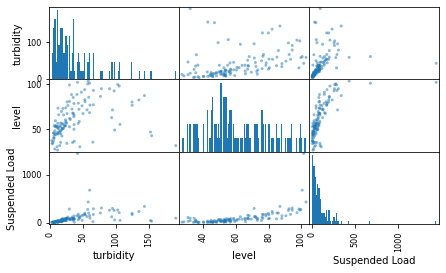

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, grid=True, figsize= (7,4),  hist_kwds= {'bins':100})

In [64]:
# Make two plots -> WRITE YOUR CODE HERE

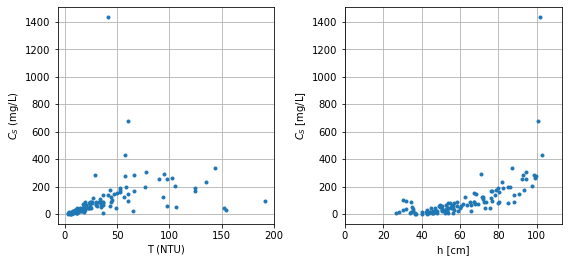

In [65]:
plt.figure(figsize=(8,6))

ax = plt.subplot(121)
ax.plot(data['turbidity'], data['Suspended Load'],'.')

ax.set_xlabel('T (NTU)')
ax.set_ylabel('$C_{S}$ (mg/L)')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
ax.grid(True)
ax1 = plt.subplot(122,sharey = ax)
ax1.plot(data['level'], data['Suspended Load'],'.')
ax1.set_xlabel('h [cm]')
ax1.set_ylabel('$C_{S}$ [mg/L]')
ax1.grid(True)
plt.xlim(0,np.nanmax(H)+10)
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.tight_layout()

Check that you plot is the same as 


<img src="./Figures/Plot Cs_h.png" witdh="100">

## Select, apply, train a model

It's now time to fit the model. We are trying several models...


But before, let us give you a **Quick remind about the Scikit-Learn Design** 
It's a quote from Aurelien Geron, _Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow_


** Quick remind about the Scikit-Learn Design** (from A. Geron, _Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow_)

Scikit-Learn’s API is remarkably well designed. The main principles are 

**Consistency**. All objects share a consistent and simple interface:

- **Estimators**. Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is con‐ sidered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

- **Transformers**. Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transforma‐ tion generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).

- **Predictors**. Finally, some estimators are capable of making predictions given a dataset; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: it predicted life satisfaction given a country’s GDP per capita. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions given a test set (and the corresponding labels in the case of supervised learning algorithms).

- **Inspection**. All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned parameters are also accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_).

- **Nonproliferation of classes**. Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

- **Composition**. Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator, as we will see.

- **Sensible defaults**. Scikit-Learn provides reasonable default values for most parameters, making it easy to create a baseline working system quickly.


### Linear regression

No need to use scikit-learn to do linear regression but let's learn to do with this library anyway.

To import the Linear Regression methods : 
`from sklearn.linear_model import LinearRegression`

#### Questions

1. Apply a classic linear regression on the data.
- Find the coefficients of the fit
- Give the score of the result

2. How good is your model ? 
- Apply your model to predict values using your input dataset: `myprediction = model.predict(dataset)`
- Measure the **MAE** (Mean Absolute Error) to evaluate the quality of your model: 

`from sklearn.metrics import mean_absolute_error`

`mymae = mean_absolute_error(myprediction-labeldata)`

In our case, `labeldata` is the Suspended Load vector

In [66]:
# WRITE YOUR CODE HERE

#### Elements of solution: 
Click below to see the solution

Independent term [47.00072313] Estimated coefficient [[1.4319755]]
Score Linear Reg:  0.11127913171259796


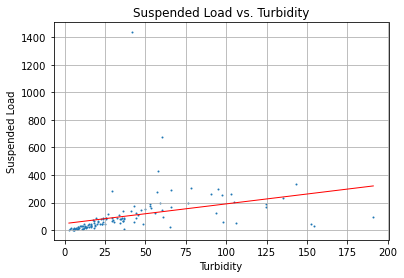

In [67]:
#Remane the vectors

TUR= data["turbidity"].to_numpy().reshape(len(data["turbidity"]),1)
SS = data["Suspended Load"].to_numpy().reshape(len(data["Suspended Load"]),1)


# Apply the regression on the "raw" data

from sklearn.linear_model import LinearRegression, RANSACRegressor

# Create linear regression object
lin_reg = LinearRegression()

# Train the model using the training sets
lin_reg.fit(TUR, SS)
print("Independent term", lin_reg.intercept_, "Estimated coefficient", lin_reg.coef_)

print("Score Linear Reg: ", lin_reg.score(TUR, SS))
# Print on the previous plot
fig, ax = plt.subplots(ncols = 1, nrows = 1, num='Turbidity vs. Suspended Load')
ax.scatter(data["turbidity"], data["Suspended Load"], s=1)
ax.axes.set_xlabel("Turbidity")
ax.axes.set_ylabel("Suspended Load")
plt.title("Suspended Load vs. Turbidity")
plt.grid()
ax.plot(TUR, lin_reg.predict(TUR), color='red',linewidth=1)
plt.show()

In [68]:
from sklearn.metrics import mean_absolute_error

predicted_SS = lin_reg.predict(TUR)
mean_absolute_error(SS, predicted_SS)

65.01288017170367

### Robust linear regression

As you can see, the data have some outiers. Is is possible to improve the result of the fit ? 

Just as an example, apply a RANSAC regression on the data.
- Coefficient ? 
- Plot of the fit
- Score of the result
- Comparison with the classical LR -> Comments ?

In [69]:
# WRITE YOUR CODE HERE

In [70]:
# Apply the classical regression on the log data
TUR_log = np.log(TUR)
SS_log  = np.log(SS)

lin_reg_log = LinearRegression()
lin_reg_log.fit(TUR_log, SS_log)

print("Score LR on log data : ", lin_reg.score(TUR_log, SS_log))

# Robustly fit linear model with RANSAC algorithm to avoid outliers in the fit
#      Méthode itérative utilisée lorsque l'ensemble de données observées peut contenir 
#      des valeurs aberrantes (outliers). Il s'agit d'un algorithme non-déterministe dans 
#      le sens où il produit un résultat correct avec une certaine probabilité seulement, 
#      celle-ci augmentant à mesure que le nombre d'itérations est grand. (WP)

ransac_log = RANSACRegressor()
ransac_log.fit(TUR_log, SS_log)
inlier_mask = ransac_log.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_y_ransac = ransac_log.predict(TUR_log)

print("Score RANSAC: ", ransac_log.score(TUR_log, SS_log))

Score LR on log data :  -1502.9345252205956
Score RANSAC:  0.6054317965047715


In [71]:

lin_reg_log2 = LinearRegression()
lin_reg_log2.fit(SS_log, TUR_log)
print("Score LR2 on log data: ", lin_reg_log2.score(SS_log, TUR_log))

Score LR2 on log data:  0.6214665332438583


##### Plot, comparison, conclusion

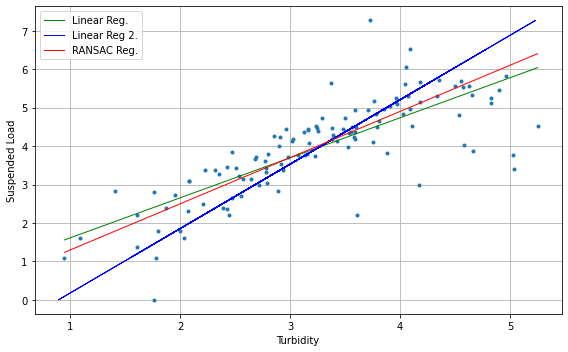

In [72]:
fig = plt.figure(figsize=(8,5))
plt.plot(TUR_log,SS_log,'.')
plt.xlabel('Turbidity')
plt.ylabel('Suspended Load')
plt.grid(which = "both")
fig.tight_layout()

plt.plot(TUR_log, lin_reg_log.predict(TUR_log), 
         color='green',linewidth=1, 
         label="Linear Reg.")

plt.plot(lin_reg_log2.predict(SS_log), SS_log,
         color='blue',linewidth=1, 
         label="Linear Reg 2.")


plt.plot(TUR_log, line_y_ransac, color='red',
         linewidth=1, label = "RANSAC Reg.")

plt.legend()

### Introduction to PCA

As you've seen during the lectures, *Principal Component Analysis* (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

But what lower dimensional hyperplane to choose ? We have to choose one axis which preserve the maximum variance. From math point of view, it is the axis which minimizes the mean square distribution between the original data and its projection on the axis. 


In this part, we are going to apply the PCA to modelise the relation between the turbidity and the suspended load. 


#### Quick remind on what the PCA is. 

By definition, the PCA is the way to project the data in a lower dimension base. The base is choosed in order to maximize the variance of the projected data.

For example: 

- Let's say that we have data in 2 dimensions ($D=2$) and we want to find project into a single dimension space ($M=1$ with the vector $u_1$). 

The variance of the projected data in $M=1$ is 

$\begin{equation}
V = \frac{1}{N}\sum\limits_{n=1}^{N} (u_1^Tx_n -u_1^T\bar{x})^2 \tag{1}
\end{equation}$ 

where $u_1^Tx_n$ is the projection of the point $x_n$ in the $u_1$ space. 

$\begin{align*}
V &= \frac{1}{N}\sum\limits_{n=1}^{N} (u_1^T(x_n -\bar{x}))^2 \\
          &=\frac{1}{N}\sum\limits_{n=1}^{N} u_1^T.(x_n -\bar{x}).(x_n -\bar{x})^T.u_1 \\
          &=u_1^T.\big\lbrace\frac{1}{N}\sum\limits_{n=1}^{N} (x_n -\bar{x}).(x_n -\bar{x})^T)\big\rbrace.u_1 \\ \\
          &= u_1^T.S.u_1
\end{align*} \tag{2}$ 

where $S$ is the covariance matrix and $\bar{x}$ is the average of the data $x_n$. 

Now, we have to maximize the variance. We constraint the norm of $u_1$ to be equal to $1$ and then, we maximize.

It can be easely expressed with the [Lagrangian multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier). 

$\begin{equation}
\mathcal{L} = u_1^T.S.u_1 + \lambda_1(1-u_1^Tu_1)
\tag{3}
\end{equation} $ 

Then we estimate the gradient in regards to $u_1$ which is equal to $0$.

Finally after calculations, we obtain:

$\begin{equation}
Su_1 = \lambda_1u_1
\tag{4}
\end{equation}$ 

It means that $u_1$ is the eigenvector of $S$ and $\lambda_1$ the eigenvalue. 

So, if $u_1$ is an eigenvector of $S$, the variance is equal to:

$\begin{equation}
V= u_1^T.S.u_1 = u_1^T.(\lambda_1.u_1) = \lambda_1
\tag{5}
\end{equation}$ 

So, to maximize the variance, we need to take de eigenvector $u_1$ corresponding to the highest eigenvalue $\lambda_1$.

- In case $M>1$, we are dealing the problem iterativaly. Each time, we are looking for another projection which maximize the variance and which is orthogonal to the previous ones. 

The projected data $y(x)$ on the $M$ dimensionnal base is finally given by the following expression:

$\begin{equation}
y(x) = (U_{:,1:M})^T.x
\tag{6}
\end{equation}$ 
where $U$ is the matrix of the eigenvectors of the covariance matrix $S$.


#### Back to the problem... 

Let's reduce the notation by using the two following variables for the turbidity and the suspended load values.

In [73]:
TUR = data["turbidity"]
SS  = data["Suspended Load"]

#### Questions
1. Using `numpy`, estimate the covariance matrix of the log of theses two vectors
2. Find the Eigen values and the Eigen vectors of the covariance matrix.
3. Calculate the coefficients of the linear equation using the Eigen values.

**hint**
`np.cov()` and `np.log` and `np.linalg.eig` could be useful here

In [74]:
# WRITE YOUR CODE HERE

In [75]:
mat_cov2 = np.cov(np.log(TUR),np.log(SS))
print("1. Covariance matrix: ")
print(mat_cov2)
eigenval, eigenvec = np.linalg.eig(mat_cov2)

print("\n2. Eigen values: ")
print(eigenval)
print("\n2. Eigen vectors: ")
print(eigenvec)

print("\n3. Coefficients of the linear equation:")
a_acp = eigenvec[:,1][1]/eigenvec[:,1][0]
b_acp = np.mean((np.log(SS)))-a_acp*np.mean((np.log(TUR)))
print("a_acp= ", a_acp, " b_acp= ", b_acp)

1. Covariance matrix: 
[[0.87448807 0.91085728]
 [0.91085728 1.52661326]]

2. Eigen values: 
[0.23309121 2.16801013]

2. Eigen vectors: 
[[-0.81762758 -0.57574746]
 [ 0.57574746 -0.81762758]]

3. Coefficients of the linear equation:
a_acp=  1.420114961326574  b_acp=  -0.6655517375119775


In fact the relation between the turbidity and the suspended load can be modelised as a _power low_

%%%%%%%%%% ECRIRE L'EQUATION EXACTE %%%%%%%%%%%
SL_acp = np.exp(b_acp)*(TUR_x**a_acp)

#### Questions
1. Create a turbidity vector `TUR_x` from $[0,1000]$
2. Create a vector `SL_acp` using the coefficients of the PCA over the values of `TUR_x`

In [76]:
# WRITE YOUR CODE HERE

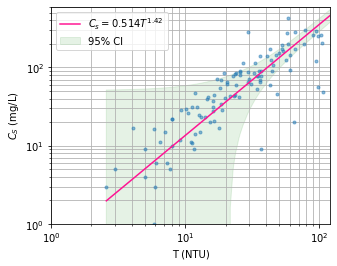

In [79]:
TUR_x = TUR ##np.arange(1,10**3)
SL_acp = np.exp(b_acp)*(TUR**a_acp)
n = len(SL_acp)


###CONFIDENCE INTERVAL / PREDICTION INTERVAL
#The equations can be found here: http://www2.stat.duke.edu/~tjl13/s101/slides/unit6lec3H.pdf
#Student t-value p<0.05 95%
tt = stats.t.ppf(1-0.025,n-2)
###In [21]:
std_residual_SL = np.sqrt(np.sum(np.power(SL_acp-SS,2))/(n-2))
##In [22]:
y_ci_above = SL_acp +\
tt*std_residual_SL*np.sqrt((1/n)+np.power(TUR_x-np.mean(TUR_x),2)
                          /(n-1)/np.var(TUR_x))

y_ci_below = SL_acp -\
tt*std_residual_SL*np.sqrt((1/n)+np.power(TUR_x-np.mean(TUR_x),2)
                          /(n-1)/np.var(TUR_x))


fig = plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.plot(TUR, SS,'.', alpha=0.5)
plt.plot(TUR_x, SL_acp, color = 'deeppink',
         label='$C_s= %1.3f T ^{%1.2f} $'%(np.exp(b_acp), a_acp))
plt.fill_between(TUR,y_ci_below,y_ci_above,color='green',alpha=0.1,label='95% CI')

plt.xlabel('T (NTU)')
plt.ylabel('$C_S$ (mg/L)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,120)
plt.ylim(1,600)
plt.legend()
plt.grid(which = 'both')
plt.show()

<img src="./Figures/Plot_PCA_fit.png" width="500">

### PCA with Scikit-learn (bonus)

This section is just to show you that everything you have calculated using the linear algebra is already implemented in `scikit-learn`

The next cells are just here to show you how to do it. Of course, don't hesitate to refer to the documentation about PCA = 
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In the previous section, we used some numpy vectors, here, we will use a DataFrame, just to show that it's also possible.

In [37]:
df = pd.DataFrame({'turbidity':TUR, 'Suspended Load':SS, 
                   'LogSL':np.log(SS), 'LogT': np.log(TUR)})

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit(df[['LogT', 'LogSL']])


`pca.explained_variance_` return the eigen values and `pca.components_` return the eigen vectors

In [39]:
print("Valeurs propres:")
e_val_pca = pca.explained_variance_
print(e_val_pca)
print("\nVecteurs propres:")
e_vec_pca = pca.components_
print(e_vec_pca)

Valeurs propres:
[2.16801013 0.23309121]

Vecteurs propres:
[[-0.57574746 -0.81762758]
 [ 0.81762758 -0.57574746]]


`pca.transform` offer the ability to plot your data in the base of the eigenvectors 

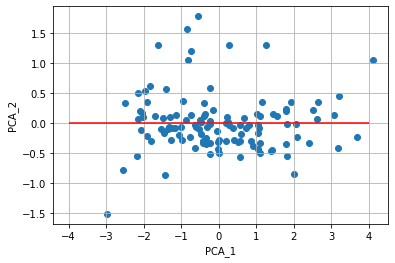

In [40]:
X_proj = pca.transform(df[['LogT', 'LogSL']])

plt.figure()
plt.scatter(X_proj[:,0], X_proj[:,1])
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.hlines(0, -4, 4, colors = 'red')
plt.grid()
plt.show()

In [41]:
print("Valeurs propres:")
e_val_pca = pca.explained_variance_
print(e_val_pca)
print("Vecteurs propres:")
e_vec_pca = pca.components_
print(e_vec_pca)

Valeurs propres:
[2.16801013 0.23309121]
Vecteurs propres:
[[-0.57574746 -0.81762758]
 [ 0.81762758 -0.57574746]]
